In [14]:
#!pip install pandas
#%matplotlib inline
import math
import numpy as np
import pandas as pd
import pandasql as ps
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype
import IPython.display as ipd
from tqdm.notebook import tqdm, trange
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

import ast

from collections import defaultdict
from scipy.stats.stats import pearsonr

plt.rcParams['axes.formatter.useoffset']=False
pd.set_option('display.max_columns', None)
#.rcParams['figure.figsize'] = [20, 10]
#plt.rcParams['figure.dpi'] = 50

In [2]:
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve

In [3]:
df = pd.read_csv('flat_df_no_nulli.csv', index_col=0)

In [4]:
features = [
 'chroma_censkurtosis',
 'chroma_censmax',
 'chroma_censmean',
 'chroma_censmedian',
 'chroma_censmin',
 'chroma_censskew',
 'chroma_censstd',
 'chroma_censcqtkurtosis',
 'chroma_cqtmax',
 'chroma_cqtmean',
 'chroma_cqtmedian',
 'chroma_cqtmin',
 'chroma_cqtskew',
 'chroma_cqtstd',
 'chroma_stftkurtosis',
 'chroma_stftmax',
 'chroma_stftmean',
 'chroma_stftmedian',
 'chroma_stftmin',
 'chroma_stftskew',
 'chroma_stftstd',
 'mfcckurtosis',
 'mfccmax',
 'mfccmean',
 'mfccmedian',
 'mfccmin',
 'mfccskew',
 'mfccstd',
 'spectral_contrastkurtosis',
 'spectral_contrastmax',
 'spectral_contrastmean',
 'spectral_contrastmedian',
 'spectral_contrastmin',
 'spectral_contrastskew',
 'spectral_contraststd',
 'tonnetzkurtosis',
 'tonnetzmax',
 'tonnetzmean',
 'tonnetzmedian',
 'tonnetzmin',
 'tonnetzskew',
 'tonnetzstd',
 'rmsekurtosis01',
 'rmsemax01',
 'rmsemean01',
 'rmsemedian01',
 'rmsemin01',
 'rmseskew01',
 'rmsestd01',
 'spectral_bandwidthkurtosis01',
 'spectral_bandwidthmax01',
 'spectral_bandwidthmean01',
 'spectral_bandwidthmedian01',
 'spectral_bandwidthmin01',
 'spectral_bandwidthskew01',
 'spectral_bandwidthstd01',
 'spectral_centroidkurtosis01',
 'spectral_centroidmax01',
 'spectral_centroidmean01',
 'spectral_centroidmedian01',
 'spectral_centroidmin01',
 'spectral_centroidskew01',
 'spectral_centroidstd01',
 'spectral_rolloffkurtosis01',
 'spectral_rolloffmax01',
 'spectral_rolloffmean01',
 'spectral_rolloffmedian01',
 'spectral_rolloffmin01',
 'spectral_rolloffskew01',
 'spectral_rolloffstd01',
 'zcrkurtosis01',
 'zcrmax01',
 'zcrmean01',
 'zcrmedian01',
 'zcrmin01',
 'zcrskew01',
 'zcrstd01',
]


bitmap = [
    'Blues',
 'Classical',
 'Country',
 'Easy Listening',
 'Electronic',
 'Experimental',
 'Folk',
 'Hip-Hop',
 'Instrumental',
 'International',
 'Jazz',
 'Old-Time / Historic',
 'Pop',
 'Rock',
 'Soul-RnB',
 'Spoken',
]

nulli = [
     'ALBUM_date_released_year',
    'ALBUM_favorites',
     'ALBUM_listens',
 'ALBUM_tracks',
 'ALBUM_type',
 'ARTIST_favorites',
 'ARTIST_location',
 'TRACK_favorites',
  'ARTIST_location_',
    'TRACK_genres_soloTop'
]

nonNumerici = [
    'ALBUM_tags',
    'ALBUM_title',
    'ARTIST_location_',
    'ARTIST_name',
    'ARTIST_tags',
    'SET_subset',
    'TRACK_genre_top',
    'TRACK_genres',
    'TRACK_genres_all',
    'TRACK_genres_soloTop',
    'TRACK_tags',
    'TRACK_title',
    'TRACK_genres_soloTop'
]

In [5]:
def Diff(li1, li2):
    return list(set(li1)-set(li2))

tutti = list(df.columns)

compl = Diff(tutti, features + bitmap + nonNumerici + nulli)

compl.sort()

compl

['ALBUM_date_released_year_',
 'ALBUM_favorites_',
 'ALBUM_listens_',
 'ALBUM_tracks_',
 'ALBUM_type_',
 'ARTIST_favorites_',
 'TRACK_bitrate',
 'TRACK_duration',
 'TRACK_interest',
 'TRACK_listens',
 'TRACK_number']

In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoders = dict()
column2encode = ['ALBUM_type_']

for col in column2encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [7]:
df['target']=[1 if genre == 'Rock' else 0 for genre in df['TRACK_genre_top']]

In [29]:
compl = Diff(tutti, bitmap + nonNumerici + nulli)

class_name = 'target'
attributes = Diff(compl, list(['TRACK_genre_top']))

df2 = df[df.TRACK_genre_top.isna() == False]

X = df2[attributes].values
y = df2[class_name]




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [9]:
df2

,ALBUM_date_released_year,ALBUM_favorites,ALBUM_type,ALBUM_tags,ALBUM_tracks,ALBUM_listens,ALBUM_title,SET_subset,ARTIST_favorites,ARTIST_location,ARTIST_tags,ARTIST_name,TRACK_duration,TRACK_favorites,TRACK_genre_top,TRACK_genres_all,TRACK_genres,TRACK_interest,TRACK_listens,TRACK_tags,TRACK_title,TRACK_bitrate,TRACK_number,rmsekurtosis01,rmsemax01,rmsemean01,rmsemedian01,rmsemin01,rmseskew01,rmsestd01,spectral_bandwidthkurtosis01,spectral_bandwidthmax01,spectral_bandwidthmean01,spectral_bandwidthmedian01,spectral_bandwidthmin01,spectral_bandwidthskew01,spectral_bandwidthstd01,spectral_centroidkurtosis01,spectral_centroidmax01,spectral_centroidmean01,spectral_centroidmedian01,spectral_centroidmin01,spectral_centroidskew01,spectral_centroidstd01,spectral_rolloffkurtosis01,spectral_rolloffmax01,spectral_rolloffmean01,spectral_rolloffmedian01,spectral_rolloffmin01,spectral_rolloffskew01,spectral_rolloffstd01,zcrkurtosis01,zcrmax01,zcrmean01,zcrmedian01,zcrmin01,zcrskew01,zcrstd01,TRACK_genres_soloTop,ARTIST_favorites_,ALBUM_tracks_,ALBUM_listens_,ALBUM_favorites_,ALBUM_type_,ALBUM_date_released_year_,Blues,Classical,Country,Easy Listening,Electronic,Experimental,Folk,Hip-Hop,Instrumental,International,Jazz,Old-Time / Historic,Pop,Rock,Soul-RnB,Spoken,chroma_censkurtosis,chroma_censmax,chroma_censmean,chroma_censmedian,chroma_censmin,chroma_censskew,chroma_censstd,chroma_censcqtkurtosis,chroma_cqtmax,chroma_cqtmean,chroma_cqtmedian,chroma_cqtmin,chroma_cqtskew,chroma_cqtstd,chroma_stftkurtosis,chroma_stftmax,chroma_stftmean,chroma_stftmedian,chroma_stftmin,chroma_stftskew,chroma_stftstd,mfcckurtosis,mfccmax,mfccmean,mfccmedian,mfccmin,mfccskew,mfccstd,spectral_contrastkurtosis,spectral_contrastmax,spectral_contrastmean,spectral_contrastmedian,spectral_contrastmin,spectral_contrastskew,spectral_contraststd,tonnetzkurtosis,tonnetzmax,tonnetzmean,tonnetzmedian,tonnetzmin,tonnetzskew,tonnetzstd,ARTIST_location_,target
track_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,2009.0,4.0,Album,[],7.0,6073.0,AWOL - A Way Of Life,small,2.302585,New Jersey,['awol'],AWOL,168,1.098612,Hip-Hop,[21],['21'],8.446127,7.165493,[],Food,256000,3,2.499856,14.748096,3.188761,2.653895,0.000000,1.565426,2.536809,3.874384,3451.105957,1607.474365,1618.850098,0.000000,-0.884317,436.808990,2.406808,5514.049805,1639.583252,1503.496704,0.000000,1.079815,719.770508,0.840540,9410.009766,3267.804688,3143.847656,0.000000,0.347372,1300.729736,5.758890,0.459473,0.085629,0.071289,0.000000,2.089872,0.061448,['Hip-Hop'],9.0,3.0,7.165493,1.098612,0,2009.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.279389,0.112555,-0.143922,-0.165123,-0.028040,-2.740602,0.132277,4.372140,-0.002102,-0.159066,-0.262436,-0.092806,-2.184695,0.028168,-0.975603,-0.000779,0.149664,-0.164355,-0.016616,0.589170,-0.006238,-0.753965,-63.770708,-54.514267,-62.362546,-24.629408,0.383883,14.101151,1.668064,-2.545115,-7.407170,-8.389809,-1.293357,-1.189231,0.746760,1.335255,-0.069000,0.063224,-0.055764,0.206749,-0.152102,-0.075675,North America,0
3,2009.0,4.0,Album,[],7.0,6073.0,AWOL - A Way Of Life,medium,2.302585,New Jersey,['awol'],AWOL,237,0.693147,Hip-Hop,[21],['21'],7.293698,6.244167,[],Electric Ave,256000,4,-0.643963,9.096919,3.607359,3.706424,0.000000,0.018619,1.952665,2.383340,3469.176514,1736.961426,1686.766602,0.000000,0.464217,486.662476,3.519866,6288.426758,1763.012451,1517.993652,0.000000,1.652693,972.758423,2.379145,10002.172852,3514.619629,3413.012695,0.000000,1.118952,1650.357788,2.824694,0.466309,0.084578,0.063965,0.000000,1.716724,0.069330,['Hip-Hop'],9.0,4.0,6.244167,0.693147,0,2009.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.348105,0.141263,0.148353,0.165589,-0.028040,-0.832174,0.120936,-1.078200,-0.002102,-0.242421,-0.303482,-0.092806,-1.014772,0.037748,-1.800064,-0.000779,-0.111860,0.160687,-0.016616,-0.667940,-0.044654,-0.336291,-72.777076,-59.487557,-6

In [30]:
clf = DecisionTreeClassifier(min_samples_leaf=10, max_depth=11, min_samples_split=124, random_state=42) #senza bitmap
clf.fit(X_train, y_train)
y_pred0 = clf.predict(X_test)
y_score = clf.predict_proba(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred0))
print('F1-score %s' % f1_score(y_test, y_pred0, average=None))
print(classification_report(y_test, y_pred0))

Accuracy 0.838801325847257
F1-score [0.89013877 0.69739683]
              precision    recall  f1-score   support

           0       0.87      0.92      0.89     10536
           1       0.76      0.65      0.70      4247

    accuracy                           0.84     14783
   macro avg       0.81      0.78      0.79     14783
weighted avg       0.83      0.84      0.83     14783



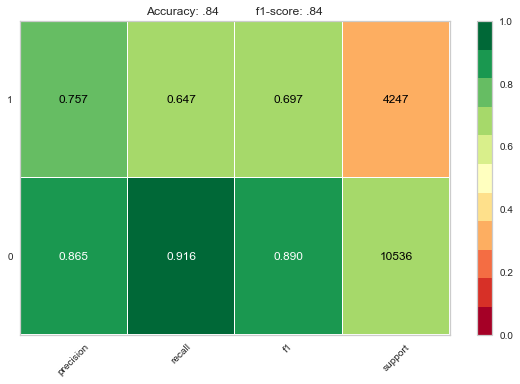

In [31]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(clf, support=True, title="Accuracy: .84           f1-score: .84", cmap="RdYlGn")

visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)    
visualizer.show(outpath="performance_dt.pdf")    

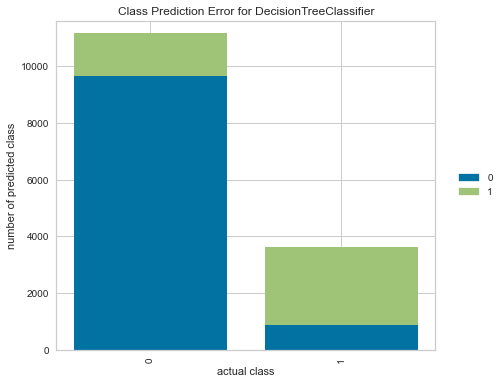

In [32]:
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import class_prediction_error

#visualizer = ClassPredictionError(clf, support=True)
#visualizer.fit(X_train, y_train) 
#visualizer.score(X_test, y_test)    
#visualizer.show()

class_prediction_error(clf, X_train, y_train, X_test, y_test)
plt.show()

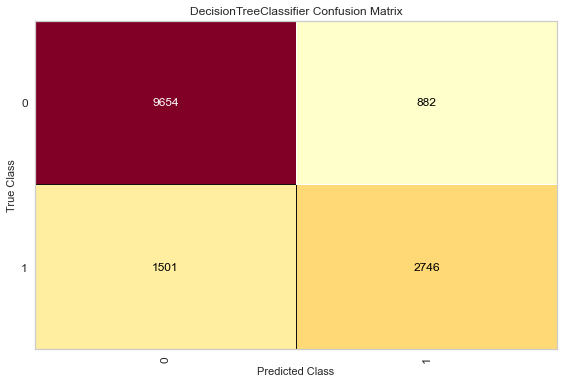

In [33]:
from yellowbrick.classifier import confusion_matrix

confusion_matrix(clf, X_train, y_train, X_test, y_test)
plt.show()

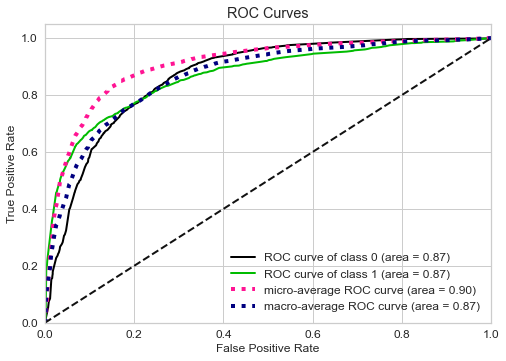

In [34]:
plot_roc(y_test, y_score)
plt.show()

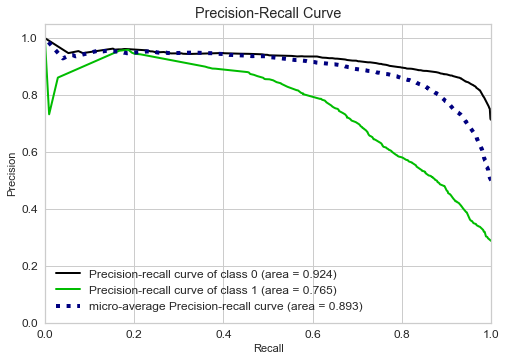

In [35]:
plot_precision_recall(y_test, y_score)
plt.show()

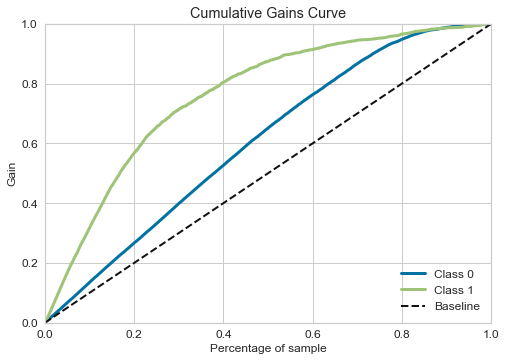

In [36]:
plot_cumulative_gain(y_test, y_score)
plt.show()

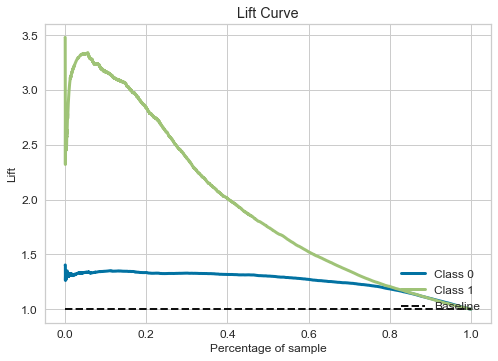

In [37]:
plot_lift_curve(y_test, y_score)
plt.show()

In [18]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [19]:
compl = Diff(tutti, bitmap + nonNumerici + nulli)

class_name = 'target'
attributes = Diff(compl, list(['TRACK_genre_top']))

df2 = df[df.TRACK_genre_top.isna() == False]

X = df2[attributes].values
y = df2[class_name]




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [20]:
def trasformaLista(stringa):
    result = list()
    tmp = stringa[1 : len(stringa)-1]
    
    splitted = tmp.split(", ")
    
    for s in splitted:
        result.append(s)
    
    return result


tmp = list();

for index in tqdm(df.index):
    #print(df[df.index == index].TRACK_genres.iloc[0])
    daTrasformare = df[df.index == index].TRACK_genres_soloTop.iloc[0]
    try:
        tmp.append(trasformaLista(daTrasformare))
    except:
        tmp.append(np.NaN)
    
df["TRACK_genres_soloTop"] = tmp

# KNN

In [8]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [9]:
tutti = list(df.columns)

compl = Diff(tutti, bitmap + nulli + nonNumerici + ["ALBUM_type_"])

In [10]:
class_name = 'target'
attributes = Diff(compl, list([class_name, "TRACK_genre_top"]))

df2 = df[df.TRACK_genre_top.isna() == False]

X = df2[attributes].values
y = df2[class_name]

minmax = MinMaxScaler()
X = minmax.fit_transform(X)

#robust = RobustScaler()
#X = robust.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [41]:
attributes.sort()
attributes

['ALBUM_date_released_year_',
 'ALBUM_favorites_',
 'ALBUM_listens_',
 'ALBUM_tracks_',
 'ARTIST_favorites_',
 'TRACK_bitrate',
 'TRACK_duration',
 'TRACK_interest',
 'TRACK_listens',
 'TRACK_number',
 'chroma_censcqtkurtosis',
 'chroma_censkurtosis',
 'chroma_censmax',
 'chroma_censmean',
 'chroma_censmedian',
 'chroma_censmin',
 'chroma_censskew',
 'chroma_censstd',
 'chroma_cqtmax',
 'chroma_cqtmean',
 'chroma_cqtmedian',
 'chroma_cqtmin',
 'chroma_cqtskew',
 'chroma_cqtstd',
 'chroma_stftkurtosis',
 'chroma_stftmax',
 'chroma_stftmean',
 'chroma_stftmedian',
 'chroma_stftmin',
 'chroma_stftskew',
 'chroma_stftstd',
 'mfcckurtosis',
 'mfccmax',
 'mfccmean',
 'mfccmedian',
 'mfccmin',
 'mfccskew',
 'mfccstd',
 'rmsekurtosis01',
 'rmsemax01',
 'rmsemean01',
 'rmsemedian01',
 'rmsemin01',
 'rmseskew01',
 'rmsestd01',
 'spectral_bandwidthkurtosis01',
 'spectral_bandwidthmax01',
 'spectral_bandwidthmean01',
 'spectral_bandwidthmedian01',
 'spectral_bandwidthmin01',
 'spectral_bandwidthsk

In [11]:
clf = KNeighborsClassifier(n_neighbors=8, weights='distance')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8581478725563146
F1-score [0.89964106 0.75815938]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90     10536
           1       0.74      0.77      0.76      4247

    accuracy                           0.86     14783
   macro avg       0.83      0.83      0.83     14783
weighted avg       0.86      0.86      0.86     14783



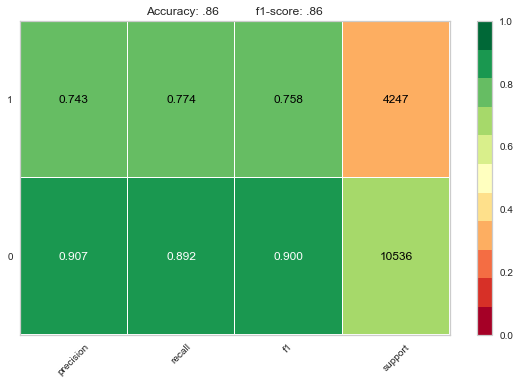

In [44]:
visualizer = ClassificationReport(clf, support=True, title="Accuracy: .86           f1-score: .86", cmap="RdYlGn")

visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)    
visualizer.show(outpath="performance_knn.pdf") 

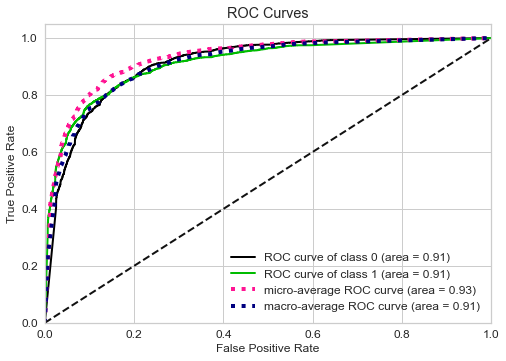

In [45]:
plot_roc(y_test, y_score)
plt.show()

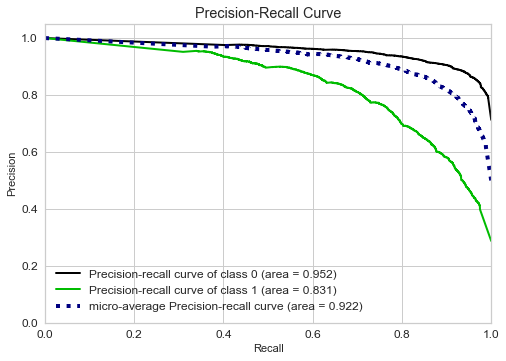

In [46]:
plot_precision_recall(y_test, y_score)
plt.show()

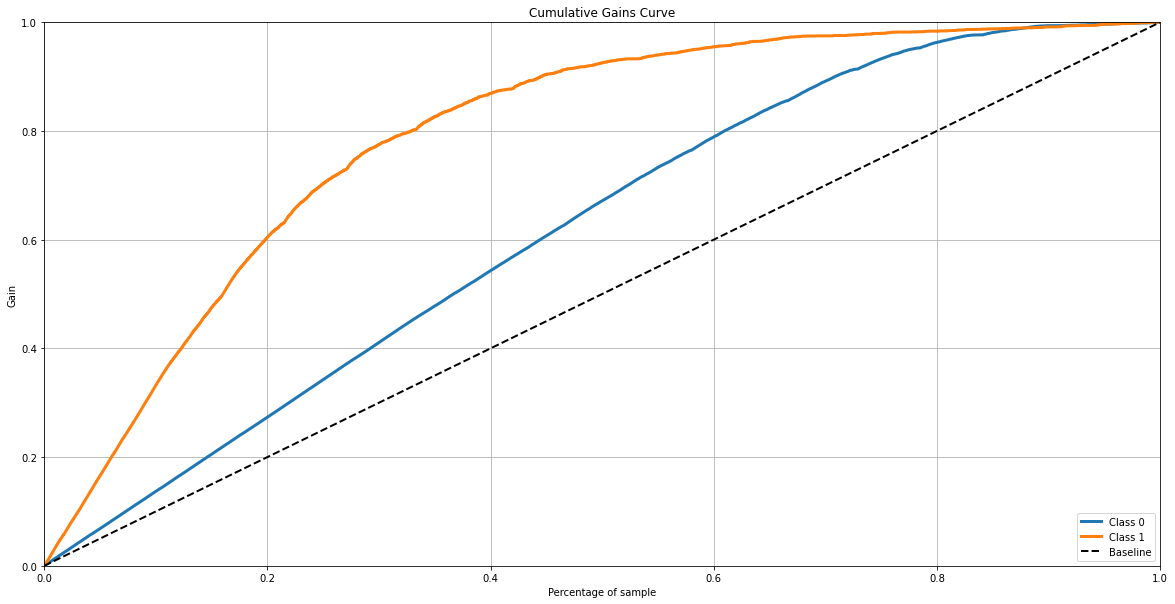

In [12]:
plot_cumulative_gain(y_test, y_score)
plt.show()

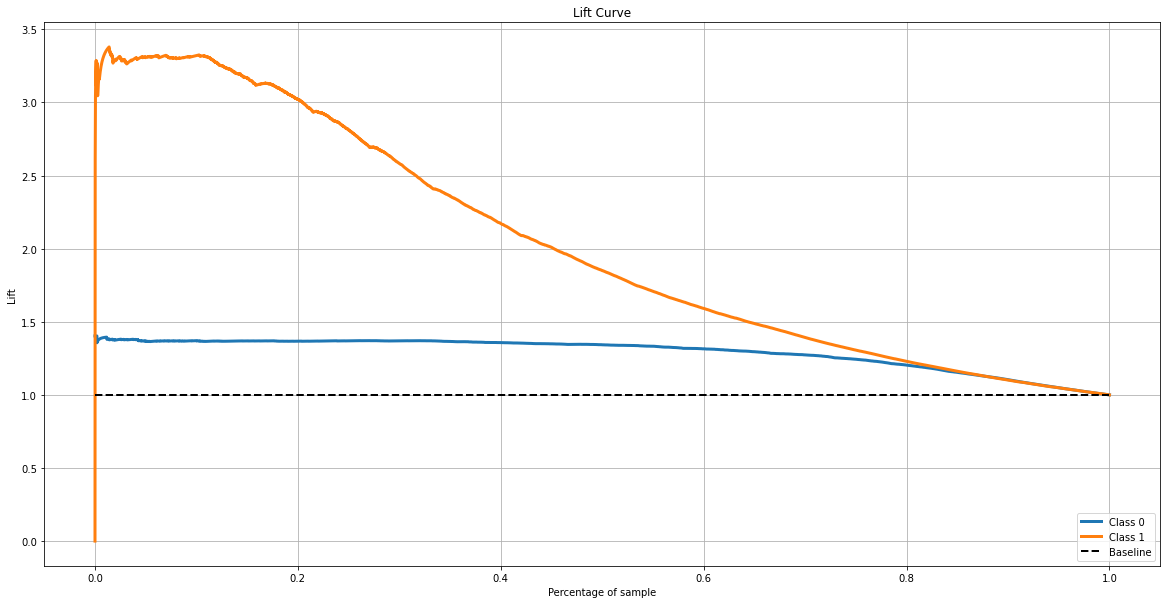

In [13]:
plot_lift_curve(y_test, y_score)
plt.show()

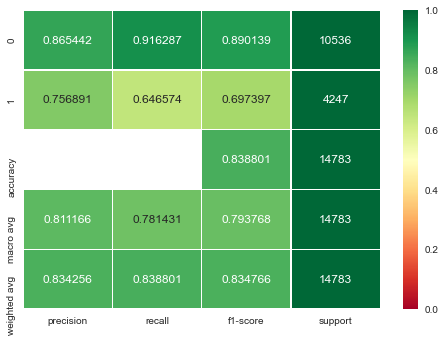

In [49]:
#mask = np.zeros((19, 4))
#mask[:,3] = True
#mask

clf_report = classification_report(y_test, y_pred0, output_dict=True)
accuracy=clf_report["accuracy"]
d = dict({"accuracy":{"f1-score":clf_report["accuracy"],
                    "support":clf_report["macro avg"]["support"]
                   }
       })
clf_report.update(d)
clf_report = pd.DataFrame(clf_report).T
#title="Performance KNN\nAccuracy media: .--           f1-score medio: .--",
sns.heatmap(clf_report, vmin=0, vmax=1,fmt='g',linewidths=.3, annot=True,  cmap="RdYlGn")